<p style="text-align:center; font-size:18px">
    «Обработка и анализ данных в Pandas»<br>
    по курсу
    «Технологии программирования и компьютерный практикум»</p>
<h4 align="center">Потребление алкоголя в России.</h4>
<div style="heigth:25px"></div>
<p style="text-align:right">
ВЫПОЛНИЛ: студент 7 группы 1 курса<br>
Кордашев Леонид Максимович<br>
<div style="heigth:25px"></div>
<p style="text-align:center">
Ростов-на-Дону, 2023</p>

## Постановка задачи.

Я выбрал тему Потребления алкоголя в России. Придумав 5 вопросов, надо дать ответ на них, используя пакет $Pandas$.

### Вопросы
1. Какие области являются лидерами в каждом из видов выпитого алкоголя? 
2. Какой вид Алкоголя выпили суммарно больше всего в России?
3. Какие регионы имеют предпочтения в алкоголе отличные от абсолютного лидера в большинстве областей?
4. Как изменялись предпочтения Ростовчан в алкоголе?
5. Какой город самый трезвый В России?

Так как используемые данные 1998-2016 года, то во всех вопросах подразумевается весь это период времени.

In [5]:
#Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
alc=pd.read_csv('russian_alcohol_consumption.csv')
alci=alc.copy()
alci.head()#размерность алкоголя в проданных литрах на человека в регионе

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [3]:
print(alci)#чтобы получить более подробную информацию о dataframe

      year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2

In [7]:
#Для удобоства переведем столбы на русский язык
alci.rename(columns={'year': 'Год', 'region': 'Регион', 
                   'wine': 'Вино', 'beer': 'Пиво', 
                   'vodka': 'Водка', 'champagne': 'Шампанское', 'brandy': 'Коньяк'}, inplace=True)
alci.set_index("Год", inplace = True)#Также поставим год в индексы для удобства
alci.head()

,Регион,Вино,Пиво,Водка,Шампанское,Коньяк
Год,,,,,,
1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [8]:
Al = alci.columns.tolist()
del Al[0]
print(Al)#Выпишем названия столбцов для последующей работы
RN=alci.iloc[1:85,0].tolist()
print(RN)#список регионов

['Вино', 'Пиво', 'Водка', 'Шампанское', 'Коньяк']
['Altai Krai', 'Amur Oblast', 'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Republic of Bashkortostan', 'Belgorod Oblast', 'Bryansk Oblast', 'Republic of Buryatia', 'Vladimir Oblast', 'Volgograd Oblast', 'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan', 'Jewish Autonomous Oblast', 'Zabaykalsky Krai', 'Ivanovo Oblast', 'Republic of Ingushetia', 'Irkutsk Oblast', 'Kabardino-Balkar Republic', 'Kaliningrad Oblast', 'Republic of Kalmykia', 'Kaluga Oblast', 'Kamchatka Krai', 'Karachay-Cherkess Republic', 'Republic of Karelia', 'Kemerovo Oblast', 'Kirov Oblast', 'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai', 'Republic of Crimea', 'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast', 'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic', 'Republic of Mordovia', 'Moscow', 'Moscow Oblast', 'Murmansk Oblast', 'Nenets Autonomous Okrug', 'Nizhny Novgorod Oblast', 'Novgorod Oblast', 'Novosibirsk Oblast', 'Omsk Oblast', 'Orenburg Obl

## Вопрос №1
Какие области являются лидерами в каждом из видов выпитого алкоголя? 

In [9]:
alci1=alci[1:85]#создаем новый dataframe для работы и берем так, чтобы было по одному региону для добавления столбцов
p='Пиво'#обозначим алкоголь переменными для удобства
w='Вино'
v='Водка'
s='Шампанское'
b='Коньяк'
pl=[]#также создадим пустые списки для найденных значений
wl=[]
vl=[]
sl=[]
bl=[]
for i in RN:#цикл по регионам
        alcO=alci[alci['Регион']==i]#выбираем dataframe по региону
        pl.append(alcO[p].sum())#суммируем значения региона по виду алкоголя
        wl.append(alcO[w].sum())
        vl.append(alcO[v].sum())
        sl.append(alcO[s].sum())
        bl.append(alcO[b].sum())
alci1['Всего пива']=pl#получаем столбец с общим кол-вом алкоголя для региона
alci1['Всего вина']=wl
alci1['Всего шампанского']=sl
alci1['Всего водки']=vl
alci1['Всего коньяка']=bl
alci1=alci1.drop(['Вино', 'Пиво', 'Водка', 'Шампанское', 'Коньяк'], axis=1)#удаляем ненужные столбцы
alci1.head()

C:\Users\Танкист\AppData\Local\Temp\ipykernel_16848\1300769047.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alci1['Всего пива']=pl#получаем столбец с общим кол-вом алкоголя для региона
C:\Users\Танкист\AppData\Local\Temp\ipykernel_16848\1300769047.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alci1['Всего вина']=wl
C:\Users\Танкист\AppData\Local\Temp\ipykernel_16848\1300769047.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Altai Krai,919.09,60.31,22.94,179.85,4.50
1998,Amur Oblast,1014.17,99.21,21.20,270.12,7.54
1998,Arkhangelsk Oblast,893.70,164.73,30.99,330.24,16.54
1998,Astrakhan Oblast,1039.21,84.92,16.37,176.64,6.86
1998,Republic of Bashkortostan,1044.47,45.54,12.65,188.27,4.88


In [10]:
alci10p=alci1.sort_values('Всего пива', ascending = False)#сортируем, чтобы получить лидера в виде алкоголя
alci10w=alci1.sort_values('Всего вина', ascending = False)
alci10s=alci1.sort_values('Всего шампанского', ascending = False)
alci10v=alci1.sort_values('Всего водки', ascending = False)
alci10b=alci1.sort_values('Всего коньяка', ascending = False)

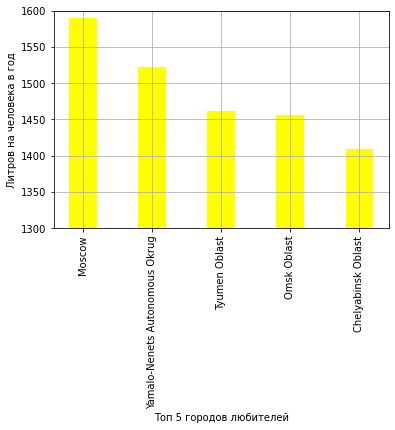

In [11]:
plt.bar(data = alci10p[1:6], x = 'Регион',#для интереса выведем пятерку лидеров, в данном случае по потреблению пива
height = 'Всего пива', width = 0.4, color = 'yellow')
plt.xticks(rotation=90)
plt.ylim(ymin=1300,ymax=1600)
plt.ylabel('Литров на человека в год')
plt.xlabel('Топ 5 городов любителей')
plt.grid()
plt.show()

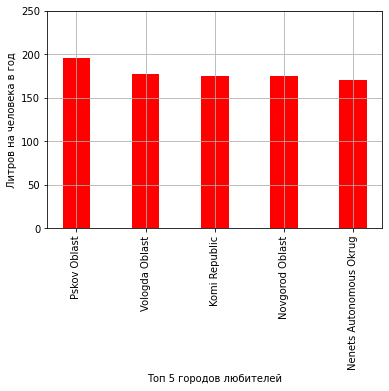

In [12]:
plt.bar(data = alci10w[1:6], x = 'Регион',
height = 'Всего вина', width = 0.4, color = 'red')
plt.xticks(rotation=90)
plt.ylim(ymin=0,ymax=250)
plt.ylabel('Литров на человека в год')
plt.xlabel('Топ 5 городов любителей')
plt.grid()
plt.show()

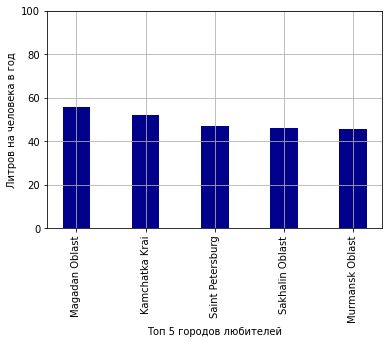

In [13]:
plt.bar(data = alci10s[1:6], x = 'Регион',
height = 'Всего шампанского', width = 0.4, color = 'darkblue')
plt.xticks(rotation=90)
plt.ylim(ymin=0,ymax=100)
plt.ylabel('Литров на человека в год')
plt.xlabel('Топ 5 городов любителей')
plt.grid()
plt.show()

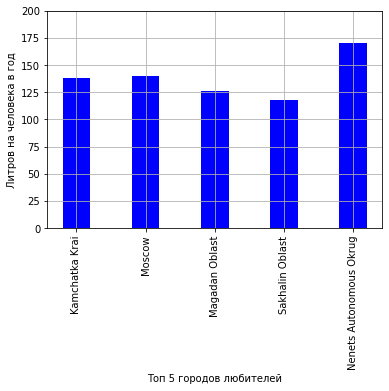

In [14]:
plt.bar(data = alci10v[1:6], x = 'Регион',
height = 'Всего вина', width = 0.4, color = 'blue')
plt.xticks(rotation=90)
plt.ylim(ymin=0,ymax=200)
plt.ylabel('Литров на человека в год')
plt.xlabel('Топ 5 городов любителей')
plt.grid()
plt.show()

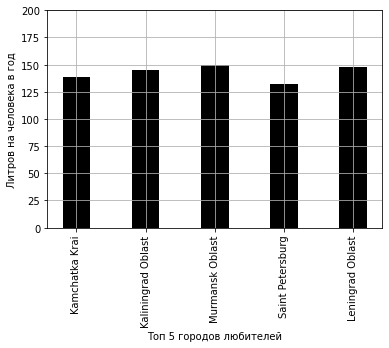

In [15]:
plt.bar(data = alci10b[1:6], x = 'Регион',
height = 'Всего вина', width = 0.4, color = 'black')
plt.xticks(rotation=90)
plt.ylim(ymin=0,ymax=200)
plt.ylabel('Литров на человека в год')
plt.xlabel('Топ 5 городов любителей')
plt.grid()
plt.show()

In [16]:
alci10p.head() 
         

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Moscow,1590.08,140.25,83.34,361.42,23.90
1998,Kamchatka Krai,1131.87,138.29,52.00,374.53,23.66
1998,Kaliningrad Oblast,1062.55,145.08,28.93,268.55,23.53
1998,Murmansk Oblast,857.56,149.22,45.72,317.20,21.42
1998,Saint Petersburg,1603.13,132.10,46.91,224.61,21.23


In [17]:
alci10w.head() 

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Republic of Karelia,804.74,204.48,20.17,291.73,14.00
1998,Pskov Oblast,904.97,195.85,22.29,202.60,8.36
1998,Vologda Oblast,1276.93,177.24,16.29,327.14,9.84
1998,Komi Republic,1249.14,175.25,32.25,392.43,15.39
1998,Novgorod Oblast,837.07,174.51,24.71,254.59,11.06


In [18]:
alci10s.head() 

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Moscow,1590.08,140.25,83.34,361.42,23.90
1998,Magadan Oblast,833.50,126.57,55.76,355.93,18.80
1998,Kamchatka Krai,1131.87,138.29,52.00,374.53,23.66
1998,Saint Petersburg,1603.13,132.10,46.91,224.61,21.23
1998,Sakhalin Oblast,940.92,117.80,45.99,345.41,17.92


In [19]:
alci10v.head() 

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Komi Republic,1249.14,175.25,32.25,392.43,15.39
1998,Kamchatka Krai,1131.87,138.29,52.00,374.53,23.66
1998,Moscow,1590.08,140.25,83.34,361.42,23.90
1998,Magadan Oblast,833.50,126.57,55.76,355.93,18.80
1998,Sakhalin Oblast,940.92,117.80,45.99,345.41,17.92


In [20]:
alci10b.head() 

,Регион,Всего пива,Всего вина,Всего шампанского,Всего водки,Всего коньяка
Год,,,,,,
1998,Moscow,1590.08,140.25,83.34,361.42,23.90
1998,Kamchatka Krai,1131.87,138.29,52.00,374.53,23.66
1998,Kaliningrad Oblast,1062.55,145.08,28.93,268.55,23.53
1998,Murmansk Oblast,857.56,149.22,45.72,317.20,21.42
1998,Saint Petersburg,1603.13,132.10,46.91,224.61,21.23


## Вопрос №2
Какой вид Алкоголя выпили суммарно больше всего в России?

In [140]:
print(f'Среднее количество выпитого алкоголя {alci[Al].mean()}')#Достаточно выявить, какой вид алкоголя в среднем чаще употребляют

Среднее количество выпитого алкоголя Вино           5.628144
Пиво          51.260148
Водка         11.818694
Шампанское     1.313177
Коньяк         0.526998
dtype: float64


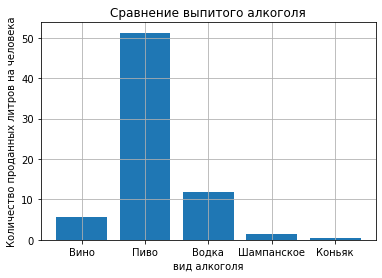

In [21]:
plt.bar(Al, alci[Al].mean())
plt.xlabel('вид алкоголя')
plt.ylabel('Количество проданных литров на человека')
plt.title('Сравнение выпитого алкоголя')
plt.grid()

#### Вывод.
В России в период 1998-2016 год больше всего употребляли пиво.

## Вопрос №3
Какие регионы имеют предпочтения в алкоголе отличные от абсолютного лидера в большинстве областей?

In [144]:
p='Пиво'#те же переменные для удобства
w='Вино'
v='Водка'
s='Шампанское'
b='Коньяк'
obl=[]#список для регионов
for i in RN:#пробегаем по регионам
    for k in w,v,s,b:#всё, кроме "лидера" пива
        alcO=alci[alci['Регион']==i]
        if alcO[p].mean()<alcO[k].mean():#условие задачи
            obl.append(i)#добавляем регион
print(obl)

['Republic of Dagestan', 'Republic of Ingushetia']


<AxesSubplot:xlabel='Год'>

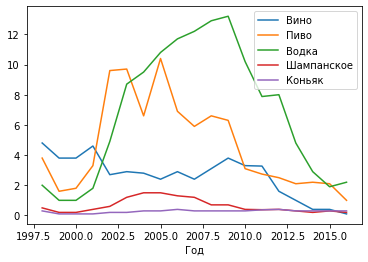

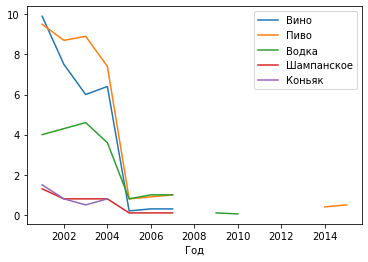

In [145]:
alcD=alci[alci['Регион']=='Republic of Dagestan']
alcIR=alci[alci['Регион']=='Republic of Ingushetia']
alcD.plot()#посмотрим, почему же так? И что они предпочитают
alcIR.plot()

In [146]:
display(alcIR)#обидно, что так мало данных

,Регион,Вино,Пиво,Водка,Шампанское,Коньяк
Год,,,,,,
1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
2000,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
2001,Republic of Ingushetia,9.9,9.5,4.00,1.3,1.5
2002,Republic of Ingushetia,7.5,8.7,4.30,0.8,0.8
2003,Republic of Ingushetia,6.0,8.9,4.60,0.8,0.5
2004,Republic of Ingushetia,6.4,7.4,3.60,0.8,0.8
2005,Republic of Ingushetia,0.2,0.8,0.80,0.1,NaN
2006,Republic of Ingushetia,0.3,0.9,1.00,0.1,NaN


## Вопрос №4
Как изменялись предпочтения Ростовчан в алкоголе?

In [9]:
alcR=alci[alci['Регион']=='Rostov Oblast']#Вводим любимую область
display(alcR)#посмотрим, что любят казаки

,Регион,Вино,Пиво,Водка,Шампанское,Коньяк
Год,,,,,,
1998,Rostov Oblast,5.30,20.10,9.70,1.3,0.1
1999,Rostov Oblast,6.20,27.80,9.70,1.5,0.1
2000,Rostov Oblast,5.50,30.00,7.90,2.2,0.2
2001,Rostov Oblast,4.10,39.90,7.10,1.8,0.2
2002,Rostov Oblast,4.00,44.70,7.00,1.5,0.3
2003,Rostov Oblast,4.40,51.10,6.90,1.5,0.3
2004,Rostov Oblast,3.80,58.80,6.90,1.1,0.3
2005,Rostov Oblast,3.80,58.70,6.70,1.3,0.4
2006,Rostov Oblast,3.30,57.30,5.60,1.3,0.4


<AxesSubplot:xlabel='Год'>

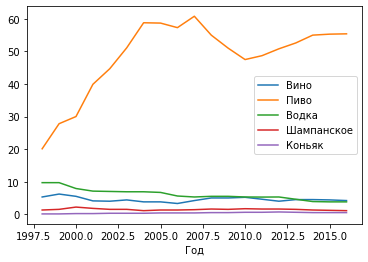

In [12]:
alcR.plot()#посмотрим на график

### Вывод
В нашем краю, как и практически по всей России люди предпочитают дешевое "жидкое золото"

## Вопрос №5
Какой регион самый трезвый В России?

In [156]:
tresv=[]#список для таких регионов
minal=100000#возьмем начальную точку
for i in RN:#тот же цикл
    alcO=alci[alci['Регион']==i]
    sumal=(alcO[Al].sum()).sum()#условие задачи(весь алкоголь за все года)
    if sumal<minal:#сравниваем и отбираем
        minal=sumal
        tresv.append(i)#добавляем "трезвенников"
print(tresv[len(tresv)-1])#берем последнего, т.е самого трезвого

Chechen Republic


In [154]:
alcC=alci[alci['Регион']=='Chechen Republic']
display(alcC)#посмотрим же

,Регион,Вино,Пиво,Водка,Шампанское,Коньяк
Год,,,,,,
1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN
1999,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2000,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2001,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2002,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2003,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2004,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2005,Chechen Republic,NaN,NaN,NaN,NaN,NaN
2006,Chechen Republic,NaN,NaN,NaN,NaN,NaN


In [158]:
print(tresv[len(tresv)-2])#мне не понравилось, поэтому давайте рассмотрим еще 4 претендента
print(tresv[len(tresv)-3])
print(tresv[len(tresv)-4])
print(tresv[len(tresv)-5])

Republic of Ingushetia
Republic of Dagestan
Republic of Buryatia
Belgorod Oblast


In [162]:
for i in range(1,6):
    alcO=alci[alci['Регион']==tresv[len(tresv)-i]]
    sumal=(alcO[Al].sum()).sum()
    print(f'В {tresv[len(tresv)-i]} было выпито {sumal}')

В Chechen Republic было выпито 8.3
В Republic of Ingushetia было выпито 95.75
В Republic of Dagestan было выпито 283.24
В Republic of Buryatia было выпито 986.88
В Belgorod Oblast было выпито 994.4599999999999


([<matplotlib.patches.Wedge at 0x15c85cee400>,
 [Text(1.0910791425125272, 0.1398080998158838, 'Republic of Ingushetia'),
  Text(0.8876119140032018, 0.649726935042386, 'Republic of Dagestan'),
  Text(-0.7510953957602601, 0.8036514832113101, 'Republic of Buryatia'),
  Text(0.2691299703621104, -1.066568825277061, 'Belgorod Oblast')])

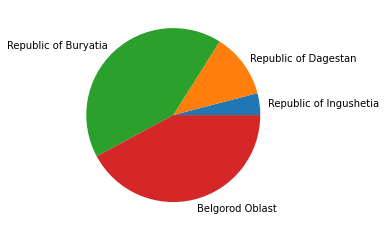

In [164]:
data=[95.75,283.24, 986.88,994.4599999999999]#для наглядности изобразим их на круговой диаграмме
lbs=['Republic of Ingushetia', 'Republic of Dagestan', 'Republic of Buryatia', 'Belgorod Oblast']
plt.pie(data, labels=lbs)

## Вывод по всей работе
Я использовал $Pandas$ для того, чтобы исселдовать употребление алкоголя в России по регионам. В общем, Россияне предпочитают пить пиво, наверняка это связано с доступностью и ценой, хотя весь мир считает, что Русский пьет только водку. 

<h4 align="center">Спасибо за внимание!</h4>